## TASK 1: Iris Flower Classification using Supervised ML

#### Ashish Haldar


### Import Modules

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Loading dataset

In [5]:
iris_data=sns.load_dataset("iris")
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
#to display stats about the data
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#to display basic info about the data types
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
#to check for number of counts each species have
iris_data["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

### Preprocessing of data

In [12]:
#to check for null values 
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

There are no null values present in the dataset.

### Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

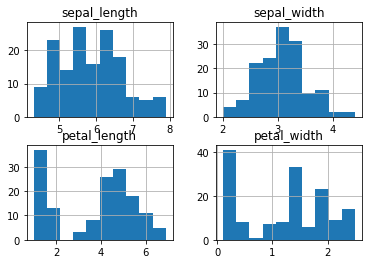

In [14]:
iris_data[["sepal_length","sepal_width","petal_length","petal_width"]].hist()

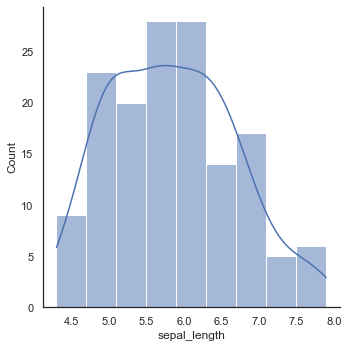

In [32]:
sns.set(style= "white")
sns.displot(iris_data["sepal_length"],kde =True)

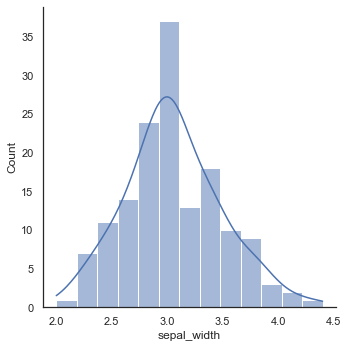

In [28]:
sns.set(style= "white")
sns.displot(iris_data["sepal_width"],kde =True)

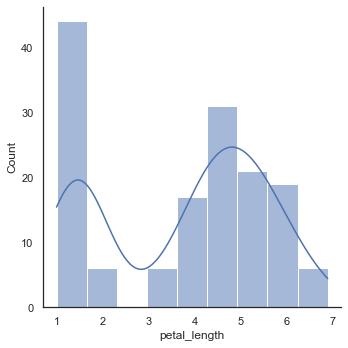

In [29]:
sns.set(style= "white")
sns.displot(iris_data["petal_length"],kde =True)

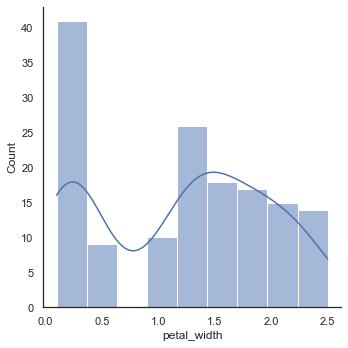

In [30]:
sns.set(style= "white")
sns.displot(iris_data["petal_width"],kde =True)

From the above figures we can surely say that sepal_length and sepal_width is normally distributed while petal_width and petal_length is minutely normally distributed

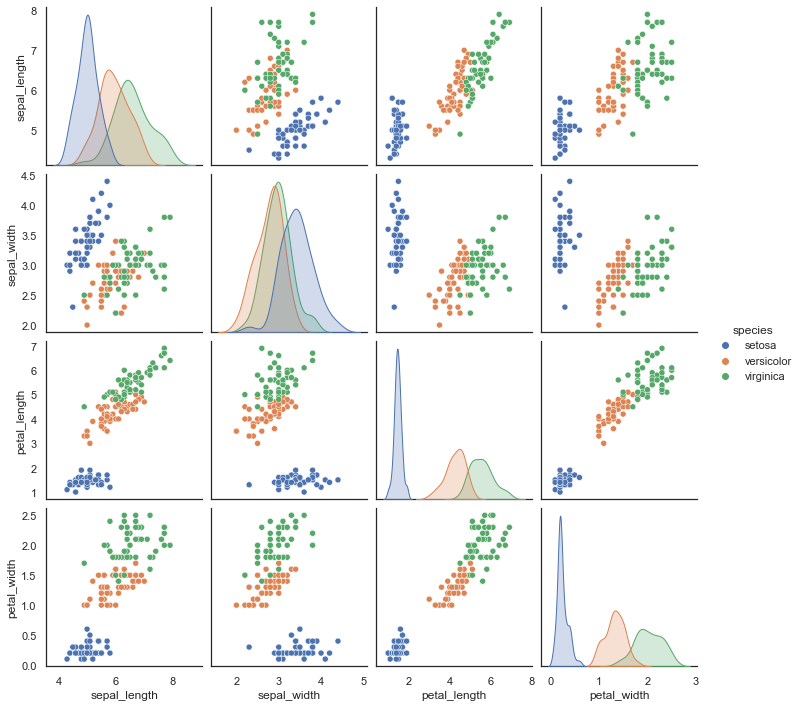

In [44]:
sns.pairplot(iris_data,hue="species")

1. Here we can see that almost everywhere setosa species is completely separable from other two species.
2. Virginica and Versicolor is somewhat not separable from each other.

### Correlation Matrix

<AxesSubplot:>

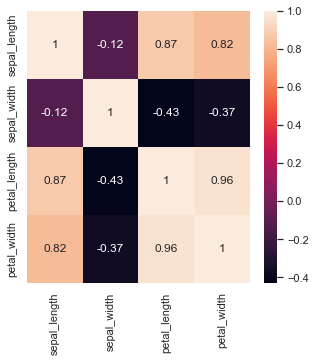

In [52]:
corr=iris_data.corr()
fig,ax =plt.subplots(figsize = (5,5))
sns.heatmap(data=corr,annot=True,ax=ax)

* sepal_length,petal_length & petal_width are positively correlated 
* petal_length and petal_width are highly correlated almost close to 1

### Label Encoder
In machine learning, we usually deal with datasets which contains multiple lables in one or more than one columns. These labels can be in the form of words or numbers. Label encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form.

In [54]:
le = LabelEncoder()
iris_data["species"] = le.fit_transform(iris_data["species"])
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Model Training

In [56]:
## Independent and dependent Variable
X = iris_data.iloc[:,:-1]
y = iris_data.iloc[:,-1]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

###### Logistic Regression

In [74]:
logmodel = LogisticRegression(solver="liblinear",max_iter=200)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [80]:
prediction = logmodel.predict(X_test)
print(classification_report(y_test, prediction))
confusion_matrix(y_test,prediction)
print("\n")
print(f"Accuracy of the logistic regression classifier on the test set: {round(logmodel.score(X_test,y_test),2)*100}%")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.71      0.83        17
           2       0.74      1.00      0.85        14

    accuracy                           0.89        45
   macro avg       0.91      0.90      0.89        45
weighted avg       0.92      0.89      0.89        45



Accuracy of the logistic regression classifier on the test set: 89.0%


Therefore, we can say that about 11% of data are misclassified to wrong groups.

In [90]:
CM=confusion_matrix(y_test.values,prediction)

In [91]:
pd.DataFrame(data=CM, index=["setosa","versicolor","virginica"],columns=["setosa","versicolor","virginica"])

,setosa,versicolor,virginica
setosa,14,0,0
versicolor,0,12,5
virginica,0,0,14


###### K-Nearest Neighbour

In [85]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn= KNeighborsClassifier()
KNNmodel = GridSearchCV(knn, params, cv = 5)
KNNmodel.fit(X_train,y_train)
y_predict = KNNmodel.predict(X_test)
print(KNNmodel.best_params_)

{'n_neighbors': 3}


In [93]:
print(classification_report(y_test,y_predict))
print(f"Accuracy of the logistic regression classifier on the test set: {round(KNNmodel.score(X_test,y_test),2)*100}%")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        17
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Accuracy of the logistic regression classifier on the test set: 98.0%


Around 2% of the data are misclassified to wrong group. Actually it is better than Logistic.

In [94]:
pd.DataFrame(data=confusion_matrix(y_test,y_predict),index=["setosa","versicolor","virginica"],columns=["setosa","versicolor","virginica"])

,setosa,versicolor,virginica
setosa,14,0,0
versicolor,0,16,1
virginica,0,0,14


So, we can say that Decision tree gives us the better accuracy compared to logistic regression 